First of all let's look at the data we have. This will help as to estimate what methods we will use for model implementation.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,12

In [3]:
#from google.colab import drive
#drive.mount('drive')

In [4]:
data = pd.read_csv('../CSV/Norwey data.csv', sep=';')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


We are interested in 20 features from CALI to RXO. Let's sclice data

In [5]:
# Select featuresfrom data. We will use from "CALI" to "RXO"
features = data.loc[:, "CALI":"RXO"]
features

,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
0,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN
1,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN
2,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN
3,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN
4,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,8.423170,NaN,NaN,NaN,2.527984,77.654900,NaN,NaN,4.586425,NaN,NaN,8.5,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN
1170507,8.379244,NaN,NaN,NaN,2.537613,75.363937,NaN,NaN,7.019858,NaN,NaN,8.5,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN
1170508,8.350248,NaN,NaN,NaN,2.491860,66.452843,NaN,NaN,9.049782,NaN,NaN,8.5,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN
1170509,8.313779,NaN,NaN,NaN,2.447539,55.784817,NaN,NaN,8.903917,NaN,NaN,8.5,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN


We have 20 features and a population of 1,170,511

In [6]:
features.describe()

,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO
count,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,69353.000000,765409.000000,671692.000000,1.089648e+06,864247.000000,682657.000000,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000
mean,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,64.895910,0.331966,6.319719,1.133581e+02,60.033980,11.931432,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496
std,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,38.435818,0.130483,10.955360,2.999050e+01,76.574359,3.330242,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030
min,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,-777.985962,-0.035822,0.099718,7.415132e+00,-999.000000,6.000000,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024
25%,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,42.962429,0.241365,3.414440,8.782584e+01,32.402981,8.500000,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681
50%,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,69.562714,0.326800,4.313530,1.095852e+02,55.390942,12.250001,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672
75%,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,87.910156,0.422951,5.968794,1.407745e+02,83.393299,12.250001,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790
max,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,963.608582,0.999570,383.129974,3.204789e+02,526.547302,26.000002,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875


All features are numerical with difference in distribution. That's why we need normalization

**1. MISSING VALUES**

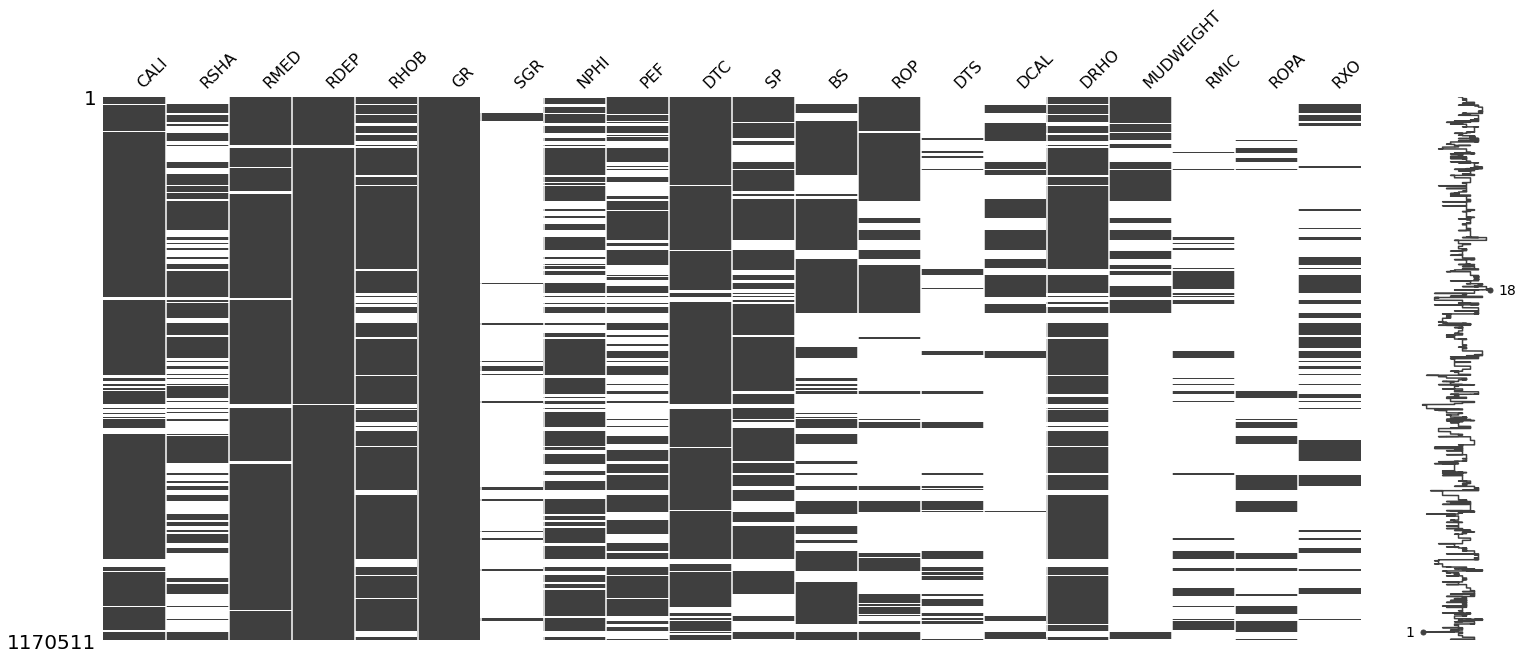

In [7]:
msno.matrix(features);

In [8]:
# Percent of missing values in data
features_entirety_pct = (features.isnull().sum()/features.shape[0]*100).astype('int').sort_values(ascending=False)
features_entirety_pct

SGR          94
DTS          85
RMIC         84
ROPA         83
DCAL         74
RXO          72
MUDWEIGHT    72
ROP          54
RSHA         46
PEF          42
BS           41
NPHI         34
SP           26
DRHO         15
RHOB         13
CALI          7
DTC           6
RMED          3
GR            0
RDEP          0
dtype: int32

We have huge amount of missing values up to 94%

**2. FEATURES CORELLATION**

Let's start with checking the correlation with target value:

In [9]:
features_n_target = features.join(data['FORCE_2020_LITHOFACIES_LITHOLOGY'])
features_n_target_corellation = features_n_target.corr()

#Correlation with output variable
cor_with_target = abs(features_n_target_corellation["FORCE_2020_LITHOFACIES_LITHOLOGY"])
#Selecting highly correlated features
relevant_features = cor_with_target[cor_with_target>0.5]
relevant_features

FORCE_2020_LITHOFACIES_LITHOLOGY    1.0
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: float64

No features highly corellated with target value <br>
We will create function that helps to estimate relative features

In [10]:
def handling_multicollinear_features(data, target_name: str) -> list:
  features_to_remove = []
  data_columns = data.columns.to_list()
  features = data.drop(columns=[target_name])
  features_n_target_corr = data.corr()
  cor_target = abs(features_n_target_corr[target_name])
  for col_name in features.columns:
    cor_feature = abs(features_n_target_corr[col_name])
    relevant_features = cor_feature[cor_feature > 0.5].drop(col_name)
    if relevant_features.empty:
      continue
    feature_with_max_corr_with_target = cor_target[relevant_features.index].idxmax()
    list_to_drop = relevant_features.index.to_list()
    list_to_drop.remove(feature_with_max_corr_with_target)
    
    if feature_with_max_corr_with_target != col_name:
      list_to_drop += [col_name]
    features_to_remove += list_to_drop

  return list(set(features_to_remove))

In [11]:
features_to_remove = handling_multicollinear_features(features_n_target, 'FORCE_2020_LITHOFACIES_LITHOLOGY')
features_to_remove

['GR', 'DTC', 'DTS', 'RHOB', 'NPHI', 'BS', 'DCAL', 'CALI', 'SGR']

There are 9 highly corellated features with corr_values > 0.5

In [12]:
features_for_use = [el for el in features.columns if el not in features_to_remove]
features_for_use

['RSHA',
 'RMED',
 'RDEP',
 'PEF',
 'SP',
 'ROP',
 'DRHO',
 'MUDWEIGHT',
 'RMIC',
 'ROPA',
 'RXO']

**3. TARGET ANALYSIS**

In [13]:
# Target
target = data['FORCE_2020_LITHOFACIES_LITHOLOGY']
sorted(set(target))

[30000,
 65000,
 65030,
 70000,
 70032,
 74000,
 80000,
 86000,
 88000,
 90000,
 93000,
 99000]

We can resume from the target that we have a task of multi-label classification. There are 12 classes

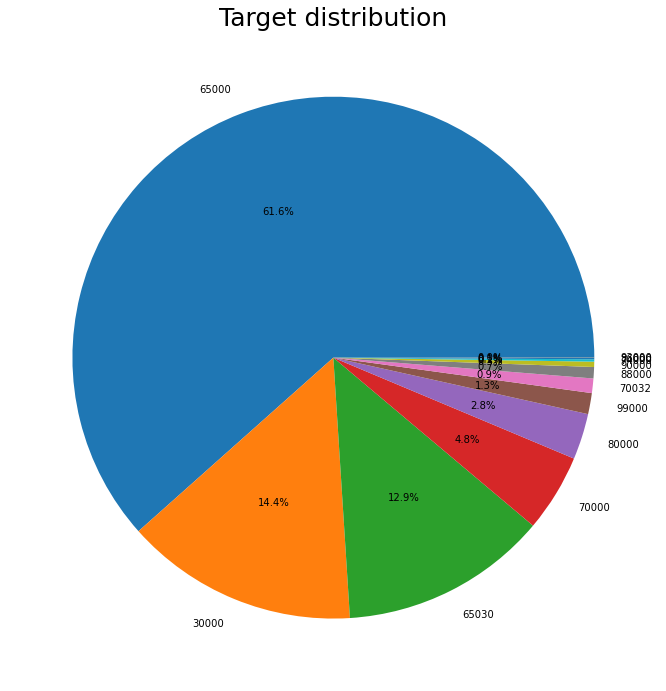

In [14]:
target_values_count = target.value_counts()
plt.figure(figsize = (12,12))
plt.pie(target_values_count.values, labels=target_values_count.index, autopct='%1.1f%%')
plt.title('Target distribution', fontsize = 25)
plt.show()

In [15]:
target.value_counts()

65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

We have a **high disbalance** of classes here. The biggest class exceeds the smallest one in about 7e3 and we have only 100 examples of minority class. With Confidence level of 95% and the Confidence Interval of 5 we need at least 384 examples of the smallest class to get any kind of meaningful result. Also we will use **Stratified Split by Labels** for train test splitting

There is possibility to implement the **oversampling technique** called **SMOTE** to increase the amount of data (for population of 1170511 we should get between 384 to 117051 examples of certain class). But in this case we have to keep the distribution of data in authentic state.

Also we should answer **the question**: what for a metric to use? Is it important to have high accuracy for the smallest class prediction? Or is it ok to use the accuracy as metric? **Macro/Micro** metric depending on the task

**The next question** is how to process missing values in data? There are 3 most popular methods: removing NANs, replacing them with some value (mean value or -1) or to create a model which will fill gaps with values based on KNN technique or with using of NN. 
Methods 1 and 3 are not suitable in our situation when we have about 50% features missing 50% of data. Therefore, we will filling missing data with -1

As a model I suppose to use **Gradient Boosting from CatBoost**. It works great with chart data and has all benefits of Gradient Boosting technique